In [1]:
%matplotlib widget

# Analysis and Inversion of ERT measurements

Note: Use data files in the form `ERT*_clean.Dat`.
This files were denoised manually in `ProsysII` and saved in `Res2dinv` data format
Original files are in folder `ERT_data`

In [10]:
# Import libraries
import pygimli as pg
from pygimli.physics import ert
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
import numpy as np

### Import data

In [3]:
# Import data for a specific line

data = ert.load('field_data/ERT_data/ERT1_clean.Dat', load=True, verbose=True)
data

21/04/24 - 18:51:51 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 72 data: 2801, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']

## Review data

In [4]:
# Create geometric factors

data['k'] = ert.createGeometricFactors(data, numerical=True)

21/04/24 - 18:51:53 - pyGIMLi - INFO - Cache /home/mariacarrizo/anaconda3/envs/pg-empy-emg3d/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (6.8s x 4): /home/mariacarrizo/.cache/pygimli/2041646891609144290


In [5]:
# Create the ERT data manager

mgr = ert.ERTManager(sr=False)

21/04/24 - 18:51:56 - pyGIMLi - INFO - Cache /home/mariacarrizo/anaconda3/envs/pg-empy-emg3d/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (0.0s x 5): /home/mariacarrizo/.cache/pygimli/1902124404465129355


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f05d0dafb50>)

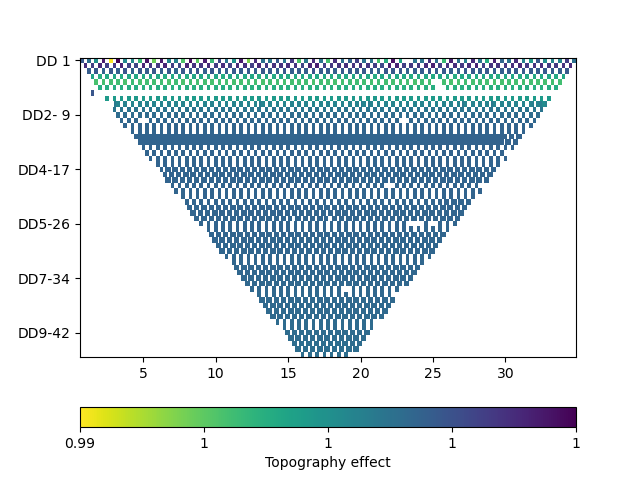

In [6]:
# Review data values

k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect', cMap='viridis_r')

In [7]:
# Check that data is OK

mgr.checkData(data)
print(data)

Data: Sensors: 72 data: 2801, nonzero entries: ['a', 'b', 'k', 'm', 'n', 'rhoa', 'valid']


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f05d0bad110>)

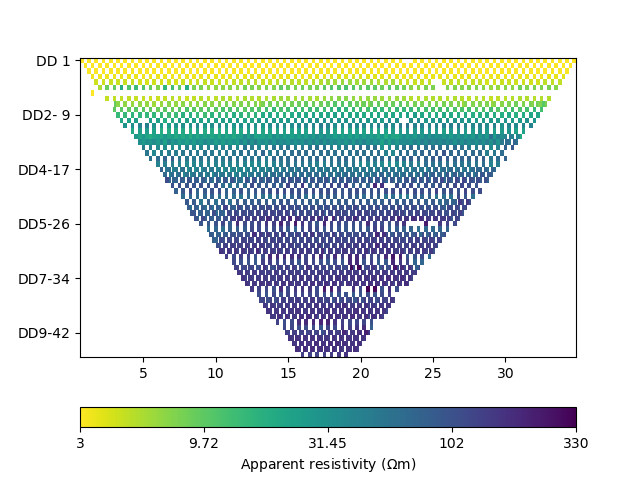

In [8]:
# Check data errors

data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100, cMap='viridis_r')

## Start inversion and Show Results

Note: Around 10 minutes computing

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f05c5641210>)

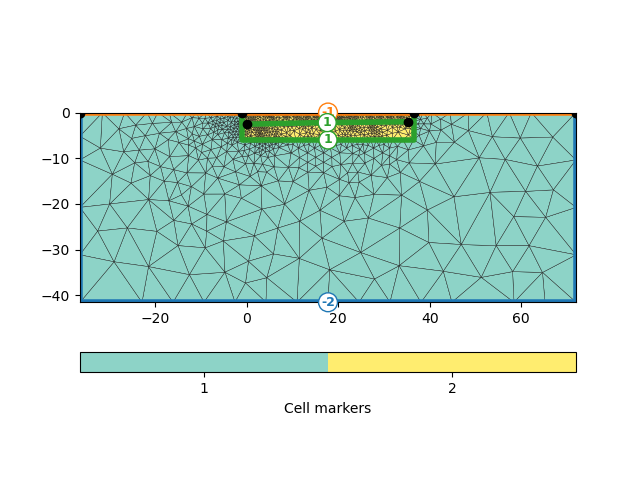

In [11]:
xz = np.load('models/boundary_est.npy')

plc = mt.createParaMeshPLC(data, paraDepth=6, boundary=1)
line = mt.createPolygon(xz, marker=1)
plc += line
mesh = mt.createMesh(plc, quality=34.3)
pg.show(mesh, markers=True, showMesh=True)

21/04/24 - 18:55:10 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
21/04/24 - 18:55:10 - pyGIMLi - INFO - Cache /home/mariacarrizo/anaconda3/envs/pg-empy-emg3d/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (6.8s x 5): /home/mariacarrizo/.cache/pygimli/2041646891609144290
21/04/24 - 18:55:10 - pyGIMLi - INFO - Found 2 regions.
21/04/24 - 18:55:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/04/24 - 18:55:10 - pyGIMLi - INFO - Found 2 regions.
21/04/24 - 18:55:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/04/24 - 18:55:10 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/04/24 - 18:55:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


RUNNING L CURVE CRITERION 
Now using LAMBDA 1.0 - 0 ITERATION 


21/04/24 - 18:55:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5195 Cells: 10000 Boundaries: 7694
21/04/24 - 18:55:11 - pyGIMLi - INFO - Use median(data values)=0.9
21/04/24 - 18:55:11 - pyGIMLi - INFO - Created startmodel from forward operator: 1776, min/max=0.900000/0.900000
21/04/24 - 18:55:59 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
21/04/24 - 18:55:59 - pyGIMLi - INFO - Cache /home/mariacarrizo/anaconda3/envs/pg-empy-emg3d/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (6.8s x 6): /home/mariacarrizo/.cache/pygimli/2041646891609144290
21/04/24 - 18:55:59 - pyGIMLi - INFO - Found 2 regions.
21/04/24 - 18:55:59 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/04/24 - 18:55:59 - pyGIMLi - INFO - Found 2 regions.
21/04/24 - 18:55:59 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/04/24 - 18:55:59 - pyGIMLi - INFO - Cre



Now using LAMBDA 2.6826957952797255 - 1 ITERATION 


21/04/24 - 18:55:59 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/04/24 - 18:55:59 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5195 Cells: 10000 Boundaries: 7694
21/04/24 - 18:55:59 - pyGIMLi - INFO - Use median(data values)=0.9
21/04/24 - 18:55:59 - pyGIMLi - INFO - Created startmodel from forward operator: 1776, min/max=0.900000/0.900000
21/04/24 - 18:56:46 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
21/04/24 - 18:56:46 - pyGIMLi - INFO - Cache /home/mariacarrizo/anaconda3/envs/pg-empy-emg3d/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (6.8s x 7): /home/mariacarrizo/.cache/pygimli/2041646891609144290
21/04/24 - 18:56:47 - pyGIMLi - INFO - Found 2 regions.
21/04/24 - 18:56:47 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/04/24 - 18:56:47 - pyGIMLi - INFO - Found 2 regions.
21/04/24 - 18:56:47 - pyGIMLi - INFO - (ERTModelling) Regi



Now using LAMBDA 7.196856730011519 - 2 ITERATION 


21/04/24 - 18:56:47 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/04/24 - 18:56:47 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5195 Cells: 10000 Boundaries: 7694
21/04/24 - 18:56:47 - pyGIMLi - INFO - Use median(data values)=0.9
21/04/24 - 18:56:47 - pyGIMLi - INFO - Created startmodel from forward operator: 1776, min/max=0.900000/0.900000
21/04/24 - 18:57:48 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
21/04/24 - 18:57:48 - pyGIMLi - INFO - Cache /home/mariacarrizo/anaconda3/envs/pg-empy-emg3d/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (6.8s x 8): /home/mariacarrizo/.cache/pygimli/2041646891609144290
21/04/24 - 18:57:48 - pyGIMLi - INFO - Found 2 regions.
21/04/24 - 18:57:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/04/24 - 18:57:48 - pyGIMLi - INFO - Found 2 regions.
21/04/24 - 18:57:48 - pyGIMLi - INFO - (ERTModelling) Regi



Now using LAMBDA 19.306977288832496 - 3 ITERATION 


21/04/24 - 18:57:48 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5195 Cells: 10000 Boundaries: 7694
21/04/24 - 18:57:48 - pyGIMLi - INFO - Use median(data values)=0.9
21/04/24 - 18:57:48 - pyGIMLi - INFO - Created startmodel from forward operator: 1776, min/max=0.900000/0.900000
21/04/24 - 18:58:48 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
21/04/24 - 18:58:48 - pyGIMLi - INFO - Cache /home/mariacarrizo/anaconda3/envs/pg-empy-emg3d/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (6.8s x 9): /home/mariacarrizo/.cache/pygimli/2041646891609144290
21/04/24 - 18:58:48 - pyGIMLi - INFO - Found 2 regions.
21/04/24 - 18:58:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/04/24 - 18:58:48 - pyGIMLi - INFO - Found 2 regions.
21/04/24 - 18:58:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/04/24 - 18:58:48 - pyGIMLi - INFO - Cre

Now using LAMBDA 51.7947467923121 - 4 ITERATION 


21/04/24 - 18:58:48 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/04/24 - 18:58:48 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5195 Cells: 10000 Boundaries: 7694
21/04/24 - 18:58:48 - pyGIMLi - INFO - Use median(data values)=0.9
21/04/24 - 18:58:48 - pyGIMLi - INFO - Created startmodel from forward operator: 1776, min/max=0.900000/0.900000
21/04/24 - 18:59:55 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
21/04/24 - 18:59:55 - pyGIMLi - INFO - Cache /home/mariacarrizo/anaconda3/envs/pg-empy-emg3d/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (6.8s x 10): /home/mariacarrizo/.cache/pygimli/2041646891609144290
21/04/24 - 18:59:55 - pyGIMLi - INFO - Found 2 regions.
21/04/24 - 18:59:55 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/04/24 - 18:59:55 - pyGIMLi - INFO - Found 2 regions.


Now using LAMBDA 138.94954943731375 - 5 ITERATION 


21/04/24 - 18:59:55 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/04/24 - 18:59:55 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/04/24 - 18:59:55 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/04/24 - 18:59:55 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5195 Cells: 10000 Boundaries: 7694
21/04/24 - 18:59:55 - pyGIMLi - INFO - Use median(data values)=0.9
21/04/24 - 18:59:55 - pyGIMLi - INFO - Created startmodel from forward operator: 1776, min/max=0.900000/0.900000
21/04/24 - 19:00:56 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
21/04/24 - 19:00:56 - pyGIMLi - INFO - Cache /home/mariacarrizo/anaconda3/envs/pg-empy-emg3d/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (6.8s x 11): /home/mariacarrizo/.cache/pygimli/2041646891609144290
21/04/24 - 19:00:56 - pyGIMLi - INFO - Found 2 regions.
21/04/24 - 19:00:56 - pyGIMLi - I

Now using LAMBDA 372.7593720314938 - 6 ITERATION 


21/04/24 - 19:00:56 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/04/24 - 19:00:56 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5195 Cells: 10000 Boundaries: 7694
21/04/24 - 19:00:56 - pyGIMLi - INFO - Use median(data values)=0.9
21/04/24 - 19:00:56 - pyGIMLi - INFO - Created startmodel from forward operator: 1776, min/max=0.900000/0.900000


Now using LAMBDA 1000.0 - 7 ITERATION 


21/04/24 - 19:02:04 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
21/04/24 - 19:02:04 - pyGIMLi - INFO - Cache /home/mariacarrizo/anaconda3/envs/pg-empy-emg3d/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (6.8s x 12): /home/mariacarrizo/.cache/pygimli/2041646891609144290
21/04/24 - 19:02:04 - pyGIMLi - INFO - Found 2 regions.
21/04/24 - 19:02:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/04/24 - 19:02:04 - pyGIMLi - INFO - Found 2 regions.
21/04/24 - 19:02:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/04/24 - 19:02:04 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/04/24 - 19:02:04 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/04/24 - 19:02:05 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5195 Cells: 10000 Boundaries: 7694
21/04/24 - 19:02:05 - pyGIMLi - INFO - Use median(da

Elapsed time is 1 minute and 41.18 seconds.
The optimal alpha =  7.196856730011519


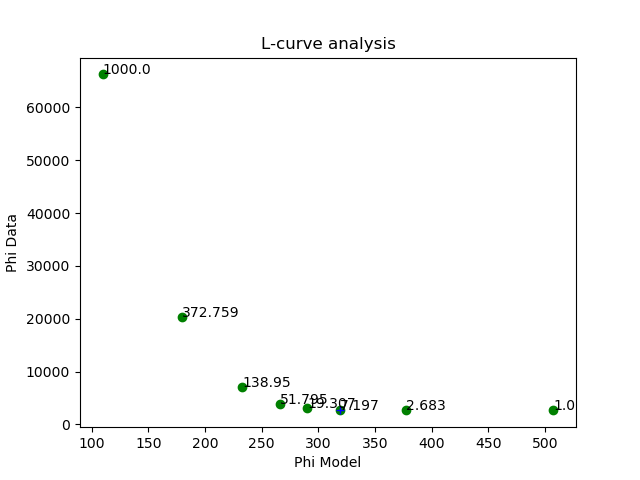

In [14]:
Lcurve=True

if Lcurve:
    # ertmanager.inv.phiModel() #x
    # ertmanager.inv.phiData() #y 
    #do it with the inverse of lambda? 
    print('RUNNING L CURVE CRITERION ')
    lambdas = np.logspace(0,3,8)
        
    phimodels = []
    phidatas = []
    chis = []
    mods = {}

    pg.tic()
    for i, a in enumerate(lambdas):
        print(f'Now using LAMBDA {a} - {i} ITERATION ')
        #ertmanager = ert.ERTManager('data/ERTLine_f.dat')
        data= ert.load('field_data/ERT_data/ERT1_clean.Dat', load=True, verbose=True)
        data['k'] = ert.createGeometricFactors(data, numerical=True)
        data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
        mgr = ert.ERTManager(data)
        mgr.setMesh(mesh)
        #mgr.invert(verbose=False)
        #ertmanager.checkData(data)
        mod = mgr.invert(data, mesh=mesh, lam=a, secNodes=3, verbose=False, maxIter=25, limits= [0.1, 500])
        phimodels.append(mgr.inv.phiModel())
        phidatas.append(mgr.inv.phiData())
        chis.append(mgr.inv.chi2())
        mods[a] = mod
    pg.toc()

    #first derivatives 
    dx= np.gradient(phimodels)
    dy = np.gradient(phidatas)

    #second derivatives 
    d2x = np.gradient(dx)
    d2y = np.gradient(dy)

    #calculation of curvature from the typical formula
    curvature = np.abs(dx * d2y - d2x * dy) / (dx * dx + dy * dy)**1.5
    print("The optimal alpha = ", lambdas[np.argmax(curvature)+1])
    plt.figure()
    plt.scatter(phimodels, phidatas, c='g')
    plt.xlabel('Phi Model')
    plt.ylabel('Phi Data')
    plt.title('L-curve analysis')
    for i, txt in enumerate(lambdas):
         txt = np.round(txt, 3)
         txt = str(txt)
         plt.annotate(txt, (phimodels[i], phidatas[i]))
    plt.plot(phimodels[np.argmax(curvature)+1], phidatas[np.argmax(curvature)+1], '+b')
    #plt.savefig(PATHPLOTS + 'Lcurveplot.jpg')
    plt.show()


In [17]:
lamb_opt = lambdas[np.argmax(curvature)+1]

data= ert.load('field_data/ERT_data/ERT1_clean.Dat', load=True, verbose=True)
data['k'] = ert.createGeometricFactors(data, numerical=True)
data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
mgr = ert.ERTManager(data)
mgr.setMesh(mesh)
mod = mgr.invert(data, mesh=mesh, lam=lamb_opt, verbose=False, maxIter=25, limits= [0.1, 500])

21/04/24 - 19:05:59 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
21/04/24 - 19:05:59 - pyGIMLi - INFO - Cache /home/mariacarrizo/anaconda3/envs/pg-empy-emg3d/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (6.8s x 14): /home/mariacarrizo/.cache/pygimli/2041646891609144290
21/04/24 - 19:05:59 - pyGIMLi - INFO - Found 2 regions.
21/04/24 - 19:05:59 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/04/24 - 19:05:59 - pyGIMLi - INFO - Found 2 regions.
21/04/24 - 19:05:59 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/04/24 - 19:05:59 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/04/24 - 19:05:59 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/04/24 - 19:05:59 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5195 Cells: 10000 Boundaries: 7694
21/04/24 - 19:05:59 - pyGIMLi - INFO - Use median(da

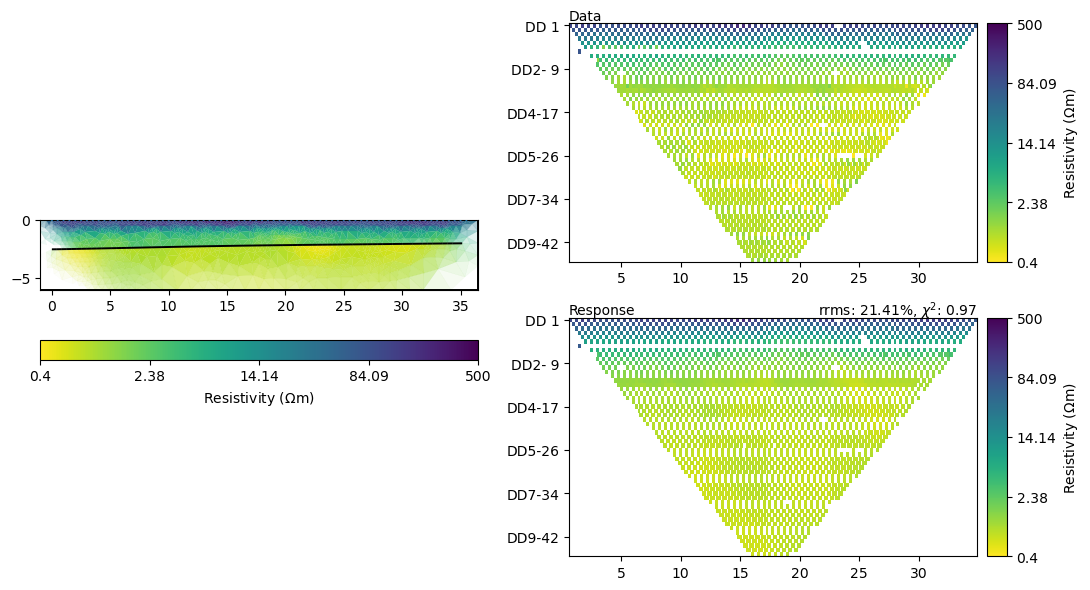

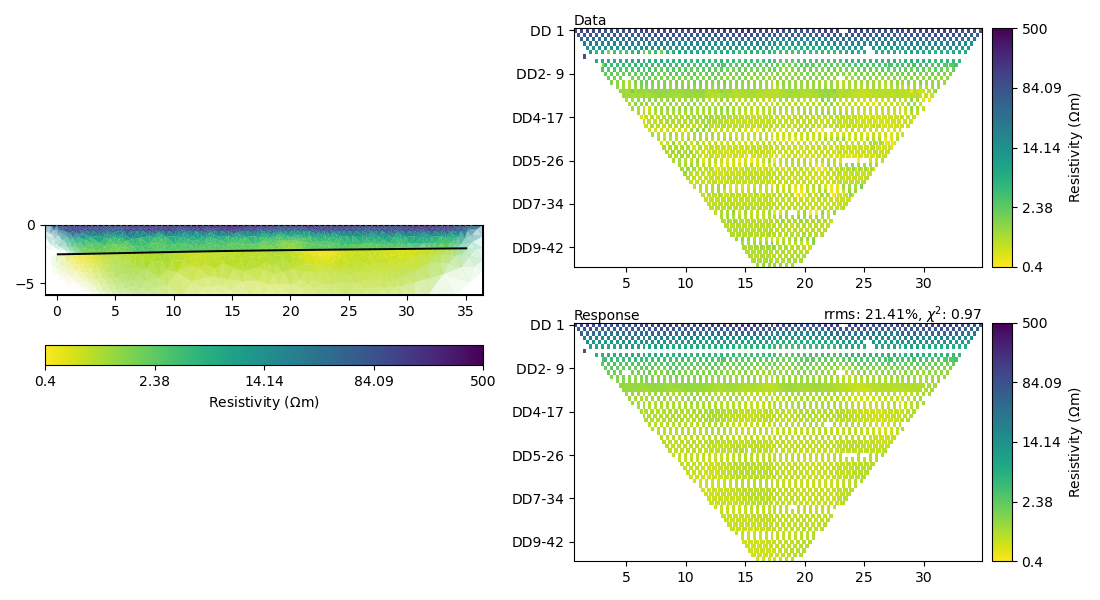

In [18]:
mgr.showResultAndFit(cMin=0.4, cMax=500, cMap='viridis_r')
#plt.savefig('figures/ERT4')

Text(0.5, 1.0, 'ERT Inversion + EMI')

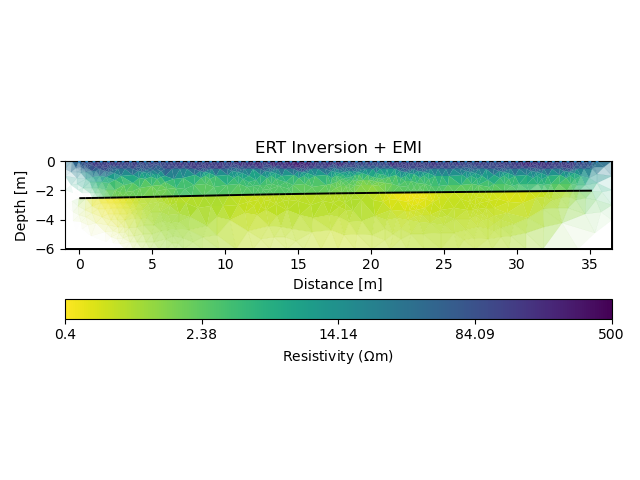

In [19]:
fig, ax = plt.subplots()

#mgr.showResult(cMin=0.1, cMax=60, cMap='viridis_r')
mgr.showModel(cMin=0.4, cMax=500, cMap='viridis_r', elecs=True, ax=ax, zMax=6, )
#ax.set_xlim([0,36])
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Distance [m]')
plt.tight_layout()
ax.set_title('ERT Inversion + EMI')
#rmse = root_mean_squared_error(models.ravel(), models_est.ravel())

#ax.text(0, -5,  "{:1.2f}".format(1.86), fontsize='small')

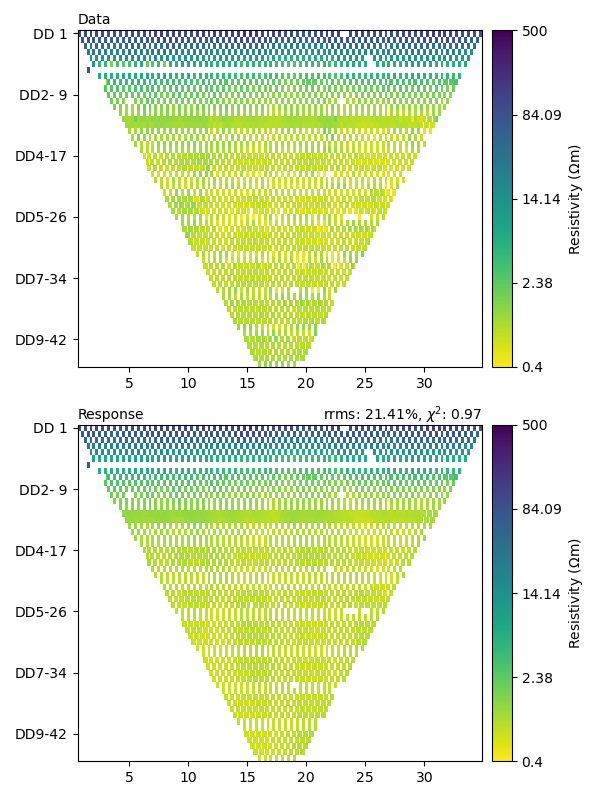

In [20]:
fig, ax = plt.subplots(2,1,figsize=(6,8))
inputs ={'fontsize':7}
mgr.showFit(axs=ax, cMin=0.4, cMax=500, cMap='viridis_r', **inputs)
plt.tight_layout()

# Save Results
#mgr.saveResult('results/ERT4')